In [50]:
import json
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import transforms

from mnist_generator import *

In [51]:
# Lecture de "l'email"
with open("email.json", "r") as fp:
    email = json.load(fp)

In [52]:
generator = Generator()
generator.load_state_dict(torch.load("mnist_generator100.pt"))
generator.eval()

Generator(
  (label_emb): Embedding(10, 10)
  (model): Sequential(
    (0): Linear(in_features=110, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2, inplace=True)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)

In [138]:
def generate_digit(generator, digit):
    z = Variable(torch.randn(1, 100))
    label = torch.LongTensor([digit])
    img = generator(z, label)
    img = (0.5 * img + 0.5).double()
    return img

In [139]:
img = generate_digit(generator, 0)
img

tensor([[[4.8944e-04, 2.3127e-05, 1.2076e-04, 1.5837e-04, 2.0203e-04,
          3.3969e-04, 4.2495e-04, 7.0068e-04, 6.7413e-05, 4.5538e-05,
          5.7393e-04, 4.5300e-05, 2.3073e-03, 4.2829e-04, 2.2033e-04,
          7.0155e-05, 7.1913e-05, 3.4392e-05, 1.8772e-04, 1.0878e-05,
          6.4194e-05, 1.6356e-03, 2.5524e-03, 2.5337e-03, 1.0464e-04,
          4.8101e-05, 3.4422e-05, 8.3148e-05],
         [1.7202e-04, 1.9366e-04, 1.0750e-04, 3.1620e-05, 1.2030e-03,
          7.1788e-04, 7.3791e-05, 3.5605e-04, 1.4520e-04, 2.1103e-04,
          1.7205e-04, 1.3810e-04, 1.7050e-04, 4.5288e-04, 1.9762e-04,
          2.9734e-04, 2.3803e-04, 2.6259e-04, 2.4915e-05, 2.6062e-04,
          2.1613e-03, 1.6057e-04, 1.1283e-04, 9.8914e-05, 1.1868e-03,
          4.8012e-05, 4.1664e-04, 1.0481e-04],
         [8.6665e-05, 1.0237e-03, 8.9109e-06, 2.2608e-04, 5.3191e-04,
          3.4630e-03, 2.4587e-04, 7.5728e-05, 1.7600e-03, 6.6841e-04,
          2.2152e-04, 1.8767e-04, 3.1731e-04, 2.0894e-04, 3.7909e-

In [61]:
transforms.ToPILImage()(img)

In [62]:
expected_notes = [19, 20, 8, 10, 11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 16,16,17,18,]

In [73]:
def modify_notes(generator, email, expected_notes):
    for i in range(len(expected_notes)):
        a = expected_notes[i]//10
        b = expected_notes[i]%10
        
        email[i]["note_dizaine"] = generate_digit(generator, a).view(784).tolist()
        email[i]["note_unite"] = generate_digit(generator, b).view(784).tolist()
    with open('modified.json', 'w') as outfile:
        json.dump(email, outfile)
        
modify_notes(generator, email, expected_notes)

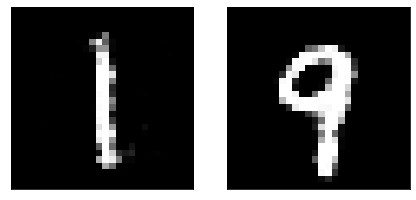

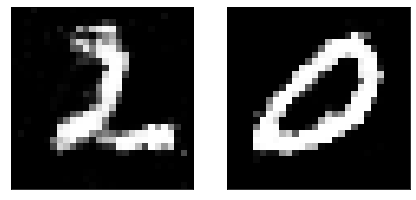

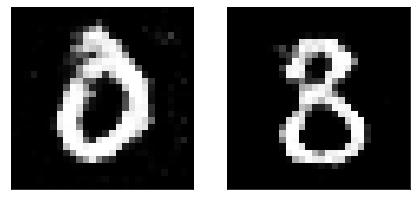

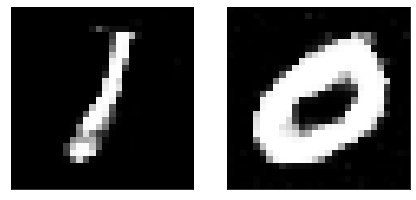

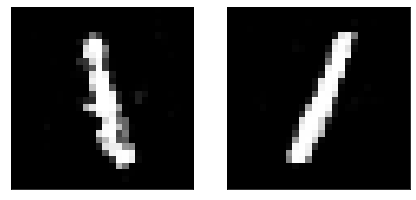

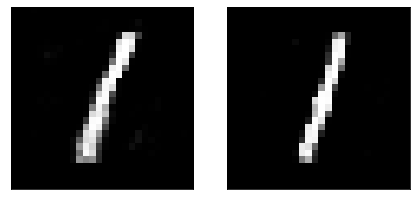

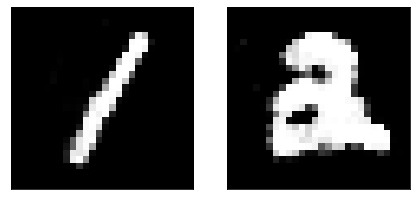

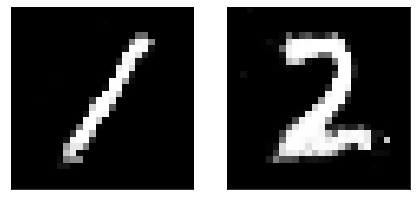

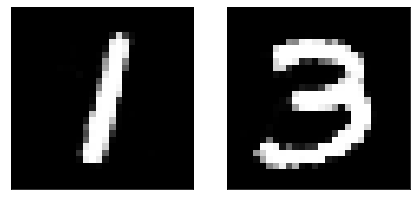

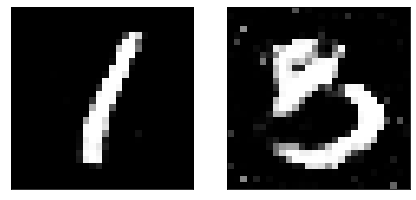

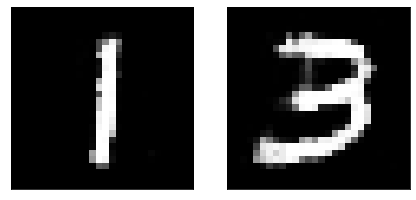

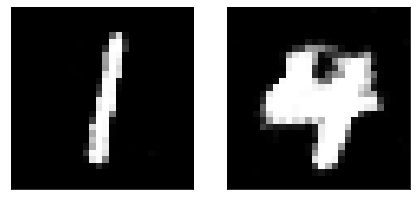

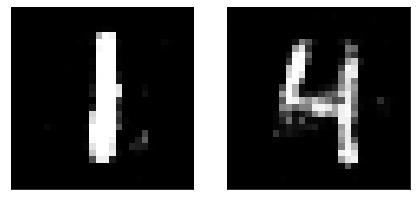

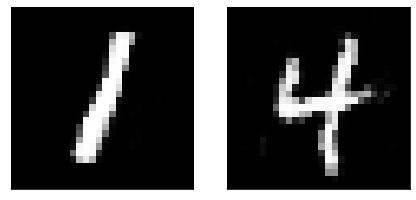

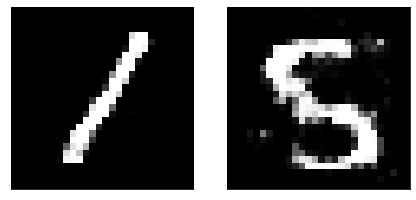

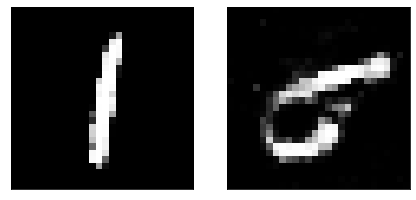

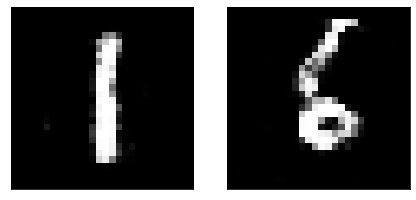

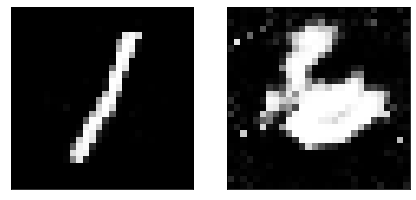

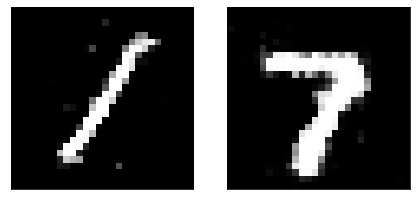

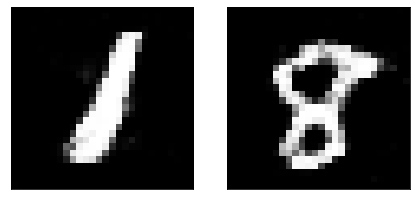

In [74]:
for i in range(len(email)):
    student = email[i]
    # Sa note 
    fig = plt.figure()
    for position, key in enumerate(["note_dizaine", "note_unite"], 1):
        plt.subplot(1, 2, position)
        plt.tight_layout()
        plt.imshow(
            np.array(student[key]).reshape(28, -1),
            cmap='gray',
            interpolation='none'
        )
        plt.xticks([])
        plt.yticks([])
    
fig;

In [75]:
# Chargement modèle MNIST
import torch
from torchvision import transforms

In [76]:
import mnist

In [81]:
# On récupère la transformation à appliquer aux images
transform = transforms.Compose([
    transforms.ToTensor(),
    
])

In [82]:
# On charge le modèle sauvegardé
mnist_model = mnist.Net()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mnist_dict = torch.load("mnist_cnn.pt", map_location=device)
mnist_model.load_state_dict(mnist_dict)
mnist_model.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [118]:
for i in range(len(email)):
    student = email[i]
    img1 = student["note_dizaine"]
    img2 = student["note_unite"]
    
    img1 = np.array(img1).reshape(28, 28).astype("uint8")
    img2 = np.array(img2).reshape(28, 28).astype("uint8")
   
    # On applique la transformation utilisée par le modèle fitté
    img1_tensor = transform(img1)
    img2_tensor = transform(img2)
    print(img1_tensor)
    break
    #print(img1_tensor)
    # On simule un batch (de taille 1)
    batched_img1_tensor = img1_tensor.reshape(1, 1, 28, 28)
    batched_img2_tensor = img2_tensor.reshape(1, 1, 28, 28)
    # On génère la prédiction
    prediction1 = mnist_model(batched_img1_tensor)
    prediction2 = mnist_model(batched_img2_tensor)
    # On garde la classe la plus probable
    number1 = prediction1.data.max(1, keepdim=True)[1][0].numpy()[0]
    number2 = prediction2.data.max(1, keepdim=True)[1][0].numpy()[0]
    print(number1, number2)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [116]:
img = generate_digit(generator, 5).detach()
img

tensor([[[2.0000e-04, 7.0000e-04, 3.0000e-04, 2.0000e-04, 7.0000e-04,
          3.0000e-04, 4.0000e-04, 1.0000e-04, 0.0000e+00, 0.0000e+00,
          2.0000e-04, 2.6000e-03, 1.0000e-04, 0.0000e+00, 4.2000e-03,
          0.0000e+00, 6.0000e-04, 1.0000e-04, 8.0000e-04, 4.7000e-03,
          0.0000e+00, 5.0000e-04, 5.4000e-03, 1.0000e-03, 0.0000e+00,
          2.0000e-04, 2.4000e-03, 3.0000e-04],
         [1.0000e-04, 4.0000e-04, 4.0000e-04, 4.0000e-04, 7.0000e-04,
          2.0000e-04, 2.0000e-04, 1.0000e-04, 0.0000e+00, 1.0000e-04,
          1.0000e-04, 0.0000e+00, 2.0000e-04, 3.0000e-04, 3.0000e-04,
          2.0000e-04, 2.0000e-03, 9.0000e-04, 1.0000e-04, 7.0000e-04,
          1.0000e-04, 2.0000e-04, 1.0000e-04, 2.0000e-04, 4.0000e-04,
          0.0000e+00, 1.0000e-04, 7.0000e-04],
         [6.0000e-04, 1.0000e-04, 4.0000e-04, 5.0000e-04, 0.0000e+00,
          1.0000e-04, 1.0000e-04, 0.0000e+00, 1.0000e-04, 2.0000e-03,
          1.4000e-03, 0.0000e+00, 4.0000e-04, 1.0000e-04, 0.0000e+

In [46]:
transforms.ToPILImage()(img)

In [47]:
img = np.array(img).reshape(28, 28).astype("uint8")
img_tensor = transform(img)

In [48]:
print(img_tensor)

tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0